## Install Packages

In [198]:
%pip install seaborn
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [199]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_style("whitegrid")
import pandas as pd
import matplotlib.pyplot as plt

## Import CSV Files

In [200]:
df = pd.read_csv("/Users/isa/Desktop/healthcare/aiproject/train_data.csv")
df_test = pd.read_csv("/Users/isa/Desktop/healthcare/aiproject/test_data.csv")
df_test_y = pd.read_csv("/Users/isa/Desktop/healthcare/aiproject/sample_sub.csv")
data_dict = pd.read_csv("/Users/isa/Desktop/healthcare/aiproject/train_data_dictionary.csv")

In [201]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [202]:
df_test_cp = df_test.copy()

In [203]:
df_test_fe = df_test.copy()

In [204]:
df_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [205]:
df_test_y.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [206]:
df["Stay"].nunique()

11

### Merge Dataset

In [207]:
df_test = df_test.merge(df_test_y, how='inner', left_on=['case_id'], right_on=['case_id'])

In [208]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137057 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [209]:
# create new data frame
mdf = df.append(df_test)

In [210]:
mdf.case_id.is_unique

True

## DATA PREPROCESSING FOR mdf

In [211]:
object_cols = mdf.select_dtypes(include='object').columns.to_list()
num_cols = mdf.drop(object_cols, axis=1).columns
object_cols.remove('Stay')

In [212]:
# convert object data to numerical using label encoding
les = {}
for col in object_cols:
  les[col] = LabelEncoder()
  data = mdf[col].values
  mdf[col]  = les[col].fit_transform(data)
  print("{}: {} \n".format(col, les[col].classes_))

Hospital_type_code: ['a' 'b' 'c' 'd' 'e' 'f' 'g'] 

Hospital_region_code: ['X' 'Y' 'Z'] 

Department: ['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery'] 

Ward_Type: ['P' 'Q' 'R' 'S' 'T' 'U'] 

Ward_Facility_Code: ['A' 'B' 'C' 'D' 'E' 'F'] 

Type of Admission: ['Emergency' 'Trauma' 'Urgent'] 

Severity of Illness: ['Extreme' 'Minor' 'Moderate'] 

Age: ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100'] 



### Correlation Matrix

<AxesSubplot:>

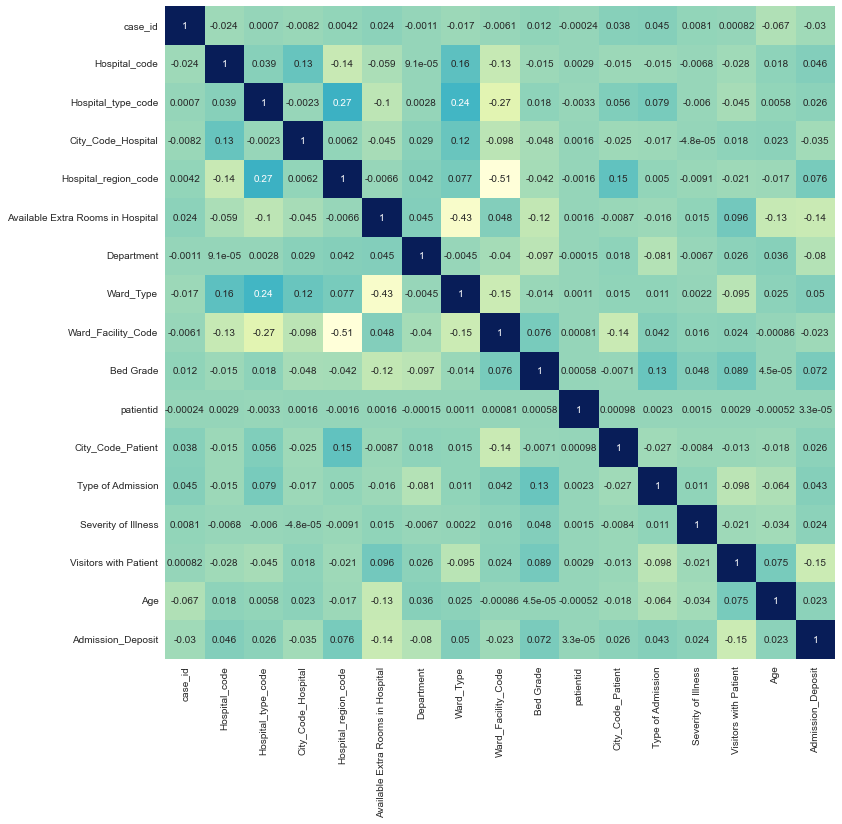

In [213]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(ax=ax, data=mdf.corr(), cmap="YlGnBu", annot=True, cbar=False)

In [214]:
mdf.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             148
patientid                               0
City_Code_Patient                    6689
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [215]:
bed_grade_mean = mdf["Bed Grade"].mean()
city_code_patient_mean = mdf["City_Code_Patient"].mean()
mdf.loc[mdf["Bed Grade"].isnull(), "Bed Grade"] = bed_grade_mean
mdf.loc[mdf["City_Code_Patient"].isnull(), "City_Code_Patient"] = city_code_patient_mean

In [216]:
mdf.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

## MLOPS

In [257]:
from time import time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [258]:
df_test = df_test.merge(df_test_y, how='inner', left_on=['case_id'], right_on=['case_id'])

In [259]:
df_selection = df.append(df_test)

In [260]:
x = mdf.drop(['Stay', 'case_id', 'patientid'], axis=1)
y = mdf.Stay

In [261]:
x[x.columns] = RobustScaler().fit_transform(x[x.columns].values)

In [222]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y)

In [223]:
values= [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

keys= ['RandomForsetClassifier',
      'KNeighborsClassifier', 
       'LogisticRegression', 
       'DecisionTreeClassifier', 
       'GaussianNB']

models= dict(zip(keys,values))
accuracy_scores=[]
train_times=[]

for key,value in models.items():
  t = time()
  value.fit(x_train,y_train)
  duration = (time() - t) / 60
  y_pred= value.predict(x_test)
  accuracy= accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
  train_times.append(duration)   
  print(key)
  print(round(accuracy * 100, 2))


RandomForsetClassifier
33.49
KNeighborsClassifier
31.79
LogisticRegression
34.41
DecisionTreeClassifier
26.91
GaussianNB
33.13


In [224]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa6b60ae940>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa441aba640>})

In [225]:
tree_cv.best_score_

0.35271573113884896

In [226]:
tree_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=2, min_samples_leaf=5)

In [227]:
print("Precision: "+str(precision_score(y_test,y_pred, average='micro')))
print("Recall: "+str(recall_score(y_test,y_pred, average='micro')))
print("F1 Puanı: "+str(precision_score(y_test,y_pred, average='micro')))
print()
print("Sınıflandırma Matrisi: \n "+str(confusion_matrix(y_test,y_pred)))


Precision: 0.3312574552320178
Recall: 0.3312574552320178
F1 Puanı: 0.3312574552320178

Sınıflandırma Matrisi: 
 [[30098  4035 11859     0     6  1362     1    49    85     0   704]
 [13759  2986  6512     0     1   173     0     2     1     0     8]
 [13258  2405 10356     0     8   143     0     6     6     0    65]
 [11503   839  3647     0     3   463     2     6     9     0    76]
 [ 2040   230  1155     0     2    51     0     1     4     0    40]
 [ 8332   163   656     0     0  1069     2    34    30     0   219]
 [  502    28   227     0     0    32     0     1     4     0    29]
 [ 2401    16    88     0     0   307     1    11    42     0   210]
 [  717     9    19     0     0   483     0    25    16     0   182]
 [  590     7    32     0     1    63     0     3     8     0   126]
 [  801    12    34     0     1   362     1    20    46     0   728]]


In [228]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for mdf')
    plt.show()

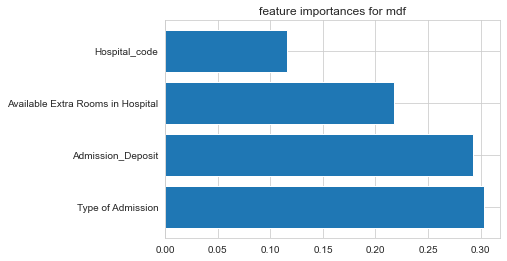

In [229]:
features_names = x_train.columns
f_importances(abs(tree_cv.best_estimator_.feature_importances_), features_names, top=4)

## VALIDATION

In [268]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [269]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_test=dtc.predict(x_val)
y_pred_train=dtc.predict(x_train)
print("Train for Accuracy: "+str(accuracy_score(y_train,y_pred_train)))
print("Validation for Accuracy: "+str(accuracy_score(y_val,y_pred_test)))
print()
print("Precision: "+str(precision_score(y_val,y_pred_test,average='micro')))
print("Recall: "+str(recall_score(y_val,y_pred_test,average='micro')))
print("F1 Puanı: "+str(precision_score(y_val,y_pred_test,average='micro')))
print()
print("Validation Confusion Matrix: \n "+str(confusion_matrix(y_val,y_pred_test)))
print()
print("Train Confusion Matrix: \n "+str(confusion_matrix(y_train,y_pred_train)))

Train for Accuracy: 0.9995765981069231
Validation for Accuracy: 0.26916406267151605

Precision: 0.26916406267151605
Recall: 0.26916406267151605
F1 Puanı: 0.26916406267151605

Validation Confusion Matrix: 
 [[17358  8521  9309  5697  1318  3387   292  1081   434   257   545]
 [ 8272  5776  5058  2433   581   804   110   217    62    56    73]
 [ 9057  5188  6974  2827   887   774   179   168    61    51    81]
 [ 5325  2314  2738  2947   469  1744   103   496   145   114   153]
 [ 1251   585   762   441   170   167    29    55    26    15    22]
 [ 3248   788   750  1755   213  2310    76   659   291   153   262]
 [  262    99   164   104    36    80    20    25     8     8    17]
 [  962   205   160   462    54   603    25   318    64    62   161]
 [  447    57    64   117    26   269    18    63   248    13   129]
 [  244    49    42   100    16   161     6    72    19    65    56]
 [  505    61    77   130    23   250    24   152   137    51   595]]

Train Confusion Matrix: 
 [[11246

## FEATURE SELECTION

In [232]:
from scipy.stats import uniform
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [233]:
# TRAIN dataset converted to digitized
## alternatively labelEncoder() can be used

In [234]:
    bed_grade_mean = df["Bed Grade"].mean()
    city_code_patient_mean = df["City_Code_Patient"].mean()
    df.loc[df["Bed Grade"].isnull(), "Bed Grade"] = bed_grade_mean
    df.loc[df["City_Code_Patient"].isnull(), "City_Code_Patient"] = city_code_patient_mean

In [235]:
    df_train = df[
        ["case_id","Hospital_code","Department", "Age", "Severity of Illness", "Type of Admission", "Stay"]].copy()
    # print("TRAIN DATA")
    # 0 ->  gynecology / 1 -> anesthesia / 2-> radiotherapy / 3 -> TB & Chest disease / 4 -> surgery
    # print(df["Department"].value_counts())
    df_train = df_train.replace(['gynecology'], '0')
    df_train = df_train.replace(['anesthesia'], '1')
    df_train = df_train.replace(['radiotherapy'], '2')
    df_train = df_train.replace(['TB & Chest disease'], '3')
    df_train = df_train.replace(['surgery'], '4')
    # print(df_train["Department"].value_counts())

    # 0 -> Moderate / 1 -> Minor / 2 -> Extreme / 3 -> Severity of Illness
    # print(df["Severity of Illness"].value_counts())
    df_train = df_train.replace(['Moderate'], '0')
    df_train = df_train.replace(['Minor'], '1')
    df_train = df_train.replace(['Extreme'], '2')
    # print(df_train["Severity of Illness"].value_counts())

    # 0 -> Trauma / 1 -> Emergency / 2 -> Urgent
    # print(df["Type of Admission"].value_counts())
    df_train = df_train.replace(['Trauma'], '0')
    df_train = df_train.replace(['Emergency'], '1')
    df_train = df_train.replace(['Urgent'], '2')
    # print(df_train["Type of Admission"].value_counts())

    # 0 -> 41-50 / 1 -> 31-40 / 2 -> 51-60 / 3 -> 21-30 / 4 -> 71-80 / 5 -> 61-70
    # / 6 -> 11-20 / 7 -> 81-90 / 8 -> 0-10 / 9 -> 91-100
    # print(df["Age"].value_counts())
    df_train = df_train.replace(['41-50'], '0')
    df_train = df_train.replace(['31-40'], '1')
    df_train = df_train.replace(['51-60'], '2')
    df_train = df_train.replace(['21-30'], '3')
    df_train = df_train.replace(['71-80'], '4')
    df_train = df_train.replace(['61-70'], '5')
    df_train = df_train.replace(['11-20'], '6')
    df_train = df_train.replace(['81-90'], '7')
    df_train = df_train.replace(['0-10'], '8')
    df_train = df_train.replace(['91-100'], '9')
    # print(df_train["Age"].value_counts())

    # 0 -> 21-30 / 1 -> 11-20 / 2 -> 31-40 / 3 -> 51-60 / 4 -> 0-10 / 5 -> 41-50
    # 6 -> 71-80 / 7 -> More than 100 Days /  8 -> 81-90 / 9 -> 91-100 / 10 -> 61-70
    # print(df["Stay"].value_counts())
    df_train = df_train.replace(['21-30'], '0')
    df_train = df_train.replace(['11-20'], '1')
    df_train = df_train.replace(['31-40'], '2')
    df_train = df_train.replace(['51-60'], '3')
    df_train = df_train.replace(['0-10'], '4')
    df_train = df_train.replace(['41-50'], '5')
    df_train = df_train.replace(['71-80'], '6')
    df_train = df_train.replace(['More than 100 Days'], '7')
    df_train = df_train.replace(['81-90'], '8')
    df_train = df_train.replace(['91-100'], '9')
    df_train = df_train.replace(['61-70'], '10')
    # print(df_train["Stay"].value_counts())

In [236]:
# TEST dataset converted to digitized
## alternatively labelEncoder() can be used

In [237]:
    bed_grade_mean = df_test_cp["Bed Grade"].mean()
    city_code_patient_mean = df_test_cp["City_Code_Patient"].mean()
    df_test_cp.loc[df_test_cp["Bed Grade"].isnull(), "Bed Grade"] = bed_grade_mean
    df_test_cp.loc[df_test_cp["City_Code_Patient"].isnull(), "City_Code_Patient"] = city_code_patient_mean

In [238]:
    df_test_cp = df_test_cp[
        ["case_id","Hospital_code","Department", "Age", "Severity of Illness", "Type of Admission"]].copy()

    # 0 ->  gynecology / 1 -> anesthesia / 2-> radiotherapy / 3 -> TB & Chest disease / 4 -> surgery
    # print(df_test_cp["Department"].value_counts())
    df_test_cp = df_test_cp.replace(['gynecology'], '0')
    df_test_cp = df_test_cp.replace(['anesthesia'], '1')
    df_test_cp = df_test_cp.replace(['radiotherapy'], '2')
    df_test_cp = df_test_cp.replace(['TB & Chest disease'], '3')
    df_test_cp = df_test_cp.replace(['surgery'], '4')
    # print(df_test_cp["Department"].value_counts())

    # 0 -> Moderate / 1 -> Minor / 2 -> Extreme / 3 -> Severity of Illness
    # print(df_test_cp["Severity of Illness"].value_counts())
    df_test_cp = df_test_cp.replace(['Moderate'], '0')
    df_test_cp = df_test_cp.replace(['Minor'], '1')
    df_test_cp = df_test_cp.replace(['Extreme'], '2')
    # print(df_test_cp["Severity of Illness"].value_counts())

    # 0 -> Trauma / 1 -> Emergency / 2 -> Urgent
    # print(df_test_cp["Type of Admission"].value_counts())
    df_test_cp = df_test_cp.replace(['Trauma'], '0')
    df_test_cp = df_test_cp.replace(['Emergency'], '1')
    df_test_cp = df_test_cp.replace(['Urgent'], '2')
    # print(df_test_cp["Type of Admission"].value_counts())

    # 0 -> 41-50 / 1 -> 31-40 / 2 -> 51-60 / 3 -> 21-30 / 4 -> 71-80 / 5 -> 61-70
    # / 6 -> 11-20 / 7 -> 81-90 / 8 -> 0-10 / 9 -> 91-100
    # print(df_test_cp["Age"].value_counts())
    df_test_cp = df_test_cp.replace(['41-50'], '0')
    df_test_cp = df_test_cp.replace(['31-40'], '1')
    df_test_cp = df_test_cp.replace(['51-60'], '2')
    df_test_cp = df_test_cp.replace(['21-30'], '3')
    df_test_cp = df_test_cp.replace(['71-80'], '4')
    df_test_cp = df_test_cp.replace(['61-70'], '5')
    df_test_cp = df_test_cp.replace(['11-20'], '6')
    df_test_cp = df_test_cp.replace(['81-90'], '7')
    df_test_cp = df_test_cp.replace(['0-10'], '8')
    df_test_cp = df_test_cp.replace(['91-100'], '9')
    # print(df_test_cp["Age"].value_counts())

In [239]:
df_test_cp = df_test_cp.merge(df_test_y, how='inner', left_on=['case_id'], right_on=['case_id'])

In [240]:
df_sn = df_train.append(df_test_cp)

In [241]:
x = df_sn.drop(['Stay', 'case_id'], axis=1)
y = df_sn.Stay

In [242]:
x[x.columns] = RobustScaler().fit_transform(x[x.columns].values)

In [243]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y)

In [244]:
values= [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

keys= ['RandomForsetClassifier',
      'KNeighborsClassifier', 
       'LogisticRegression', 
       'DecisionTreeClassifier', 
       'GaussianNB']

models= dict(zip(keys,values))
accuracy_scores=[]
train_times=[]

for key,value in models.items():
  t = time()
  value.fit(x_train,y_train)
  duration = (time() - t) / 60
  y_pred= value.predict(x_test)
  accuracy= accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
  train_times.append(duration)   
  print(key)
  print(round(accuracy * 100, 2))

RandomForsetClassifier
28.62
KNeighborsClassifier
23.32
LogisticRegression
30.09
DecisionTreeClassifier
28.87
GaussianNB
30.09


## FEATURE EXTRACTION

In [245]:
#  -----------------------------FEATURE EXTRACTION WITH TRAIN --------------------------------------
## Severity of Illness -> Extreme and Age -> 61... if greater then create column named priority and 1 will be set 
## otherwise priority status will be 0

In [246]:
    df_copy_train = df_train
    options_sol = ['2']
    rslt_df = df_copy_train.loc[df_copy_train['Severity of Illness'].isin(options_sol)]
    options_age = ['4', '5', '7', '9']
    rslt_df_age = df_copy_train.loc[df_copy_train['Age'].isin(options_age)]
    df_feature_ext = df_copy_train.copy()
    
    print("rslt_df size:" + str(rslt_df.shape))
    common = rslt_df.merge(rslt_df_age, left_index=True, right_index=True, how='outer', suffixes=('', '_drop'))
    common.drop(common.filter(regex='_y$').columns.tolist(), axis=1, inplace=False)
    # print("merged two column : ", common["Stay"])
    # print(common.isnull().sum())
    common.loc[common["case_id"].isnull(), "case_id"] = "0"
    common.loc[common["Hospital_code"].isnull(), "Hospital_code"] = "0"
    common.loc[common["Department"].isnull(), "Department"] = "0"
    common.loc[common["Age"].isnull(), "Age"] = "0"
    common.loc[common["Severity of Illness"].isnull(), "Severity of Illness"] = "0"
    common.loc[common["Type of Admission"].isnull(), "Type of Admission"] = "0"
    common.loc[common["Stay"].isnull(), "Stay"] = "0"
    # print(common.isnull().sum())

    f = open("train_join.csv", "w")
    f.write("case_id,Hospital_code,Department,Age,Severity of Illness,Type of Admission,priority,Stay\n")
    for (i, row) in common.iterrows():
        if common["Hospital_code"][i] == "0" and common["Department"][i] == "0" and \
                common["Age"][i] == "0" and common["Severity of Illness"][i] == "0" and common["Type of Admission"][
            i] == "0" and common["Stay"][i] == "0":
            row["case_id"] = df_copy_train["case_id"][i]
            row["Hospital_code"] = df_copy_train["Hospital_code"][i]
            row["Department"] = df_copy_train["Department"][i]
            row["Age"] = df_copy_train["Age"][i]
            row["Severity of Illness"] = df_copy_train["Severity of Illness"][i]
            row["Type of Admission"] = df_copy_train["Type of Admission"][i]
            row["Stay"] = df_copy_train["Stay"][i]

            # row["priority"] = "NO"
            row["priority"] = "0"

        else:
            # row["priority"] = "YES"
            row["priority"] = "1"

        f.write(str(row["case_id"]) + "," + str(row["Hospital_code"]) + "," + str(row["Department"]) + "," + str(
            row["Age"]) + "," + str(row["Severity of Illness"]) + "," + str(row["Type of Admission"]) + "," 
                + str(row["priority"]) + "," + str(row["Stay"]) + "\n")
    file = open("train_join.csv", "r")
    df_common = pd.read_csv(file)
    df_common.head()

rslt_df size:(56723, 7)


,case_id,Hospital_code,Department,Age,Severity of Illness,Type of Admission,priority,Stay
0,1.0,8.0,2,2,2,1,1,8
1,2.0,2.0,2,2,2,0,1,0
2,3.0,10.0,1,2,2,0,1,1
3,4.0,26.0,2,2,2,0,1,0
4,5.0,26.0,2,2,2,0,1,0


In [247]:
#  -----------------------------FEATURE EXTRACTION WITH TEST --------------------------------------
## Severity of Illness -> Extreme and Age -> 61... if greater then create column named priority and 1 will be set 
## otherwise priority status will be 0

In [248]:
    df_test_fe = df_test_cp.copy()
    options_sol = ['2']
    rslt_df_test = df_test_fe.loc[df_test_fe['Severity of Illness'].isin(options_sol)]
    # print('\nResult Severity of Illness :\n', rslt_df_test)

    options_age = ['4', '5', '7', '9']
    rslt_df_test_age = df_test_fe.loc[df_test_fe['Age'].isin(options_age)]
    # print('\nResult Age :\n', rslt_df_test_age)

    common = rslt_df_test.merge(rslt_df_test_age, left_index=True, right_index=True, how='outer',
                                suffixes=('', '_drop'))
    common.drop(common.filter(regex='_y$').columns.tolist(), axis=1, inplace=False)

    common.loc[common["case_id"].isnull(), "case_id"] = "0"
    common.loc[common["Hospital_code"].isnull(), "Hospital_code"] = "0"
    common.loc[common["Department"].isnull(), "Department"] = "0"
    common.loc[common["Age"].isnull(), "Age"] = "0"
    common.loc[common["Severity of Illness"].isnull(), "Severity of Illness"] = "0"
    common.loc[common["Type of Admission"].isnull(), "Type of Admission"] = "0"

    # print(common.isnull().sum())

    f = open("test_join.csv", "w")
    f.write("case_id,Hospital_code,Department,Age,Severity of Illness,Type of Admission,priority\n")
    for (i, row) in common.iterrows():
        if common["Hospital_code"][i] == "0"  and common["Department"][i] == "0" and \
                common["Age"][i] == "0" and common["Severity of Illness"][i] == "0" and common["Type of Admission"][
            i] == "0":
            row["case_id"] = df_test_fe["case_id"][i]
            row["Hospital_code"] = df_test_fe["Hospital_code"][i]
            row["Department"] = df_test_fe["Department"][i]
            row["Age"] = df_test_fe["Age"][i]
            row["Severity of Illness"] = df_test_fe["Severity of Illness"][i]
            row["Type of Admission"] = df_test_fe["Type of Admission"][i]

            # row["priority"] = "NO"
            row["priority"] = "0"

        else:
            # row["priority"] = "YES"
            row["priority"] = "1"

        f.write(str(row["case_id"]) + "," + str(row["Hospital_code"]) + "," + str(row["Department"]) + "," + str(
            row["Age"]) + "," + str(row["Severity of Illness"]) + "," + str(row["Type of Admission"]) + "," 
                + str(row["priority"])  + "\n")
    file_test = open("test_join.csv", "r")
    df_test_common = pd.read_csv(file_test)
    df_test_common.head(10)


,case_id,Hospital_code,Department,Age,Severity of Illness,Type of Admission,priority
0,318439.0,21.0,0,4,0,1,0
1,318440.0,29.0,0,4,0,0,0
2,318441.0,26.0,0,4,0,1,0
3,318442.0,6.0,0,4,0,0,0
4,318443.0,28.0,0,4,0,0,0
5,318444.0,23.0,0,4,0,0,0
6,318445.0,26.0,0,4,0,0,0
7,318470.0,31.0,0,0,2,1,1
8,318471.0,6.0,0,0,2,0,1
9,318472.0,1.0,0,0,2,0,1


## MLOPS with F.Extraction

In [249]:
df_test_fe = df_test_fe.merge(df_test_y, how='inner', left_on=['case_id'], right_on=['case_id'])
df_feat = df_train.append(df_test_cp)
x = df_feat.drop(['Stay', 'case_id'], axis=1)
y = df_feat.Stay
x[x.columns] = RobustScaler().fit_transform(x[x.columns].values)

In [250]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y)

In [251]:
values= [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

keys= ['RandomForsetClassifier',
      'KNeighborsClassifier', 
       'LogisticRegression', 
       'DecisionTreeClassifier', 
       'GaussianNB']

models= dict(zip(keys,values))
accuracy_scores=[]
train_times=[]

for key,value in models.items():
  t = time()
  value.fit(x_train,y_train)
  duration = (time() - t) / 60
  y_pred= value.predict(x_test)
  accuracy= accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
  train_times.append(duration)   
  print(key)
  print(round(accuracy * 100, 2))

RandomForsetClassifier
28.78
KNeighborsClassifier
23.59
LogisticRegression
30.09
DecisionTreeClassifier
29.04
GaussianNB
30.09
